In [1]:
#import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
sb.set_style("darkgrid") 

%matplotlib inline 

In [2]:
#load dataset 
samp_superstore = pd.read_csv("sample_superstore.csv") 


## Data Wrangling

### Assessment

In [3]:
#view random samples of the dataset 
samp_superstore.sample(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2573,Standard Class,Home Office,United States,Lafayette,Indiana,47905,Central,Furniture,Furnishings,526.450,5,0.0,31.5870
4405,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,Storage,38.976,3,0.2,-2.4360
1385,Same Day,Home Office,United States,Smyrna,Georgia,30080,South,Furniture,Furnishings,18.840,3,0.0,7.1592
3576,Standard Class,Home Office,United States,Bakersfield,California,93309,West,Office Supplies,Binders,4.784,1,0.2,1.5548
4507,Standard Class,Home Office,United States,Los Angeles,California,90045,West,Office Supplies,Storage,20.340,1,0.0,0.2034
5179,Standard Class,Corporate,United States,Los Angeles,California,90036,West,Technology,Phones,258.576,2,0.2,19.3932
1314,Standard Class,Corporate,United States,Los Angeles,California,90032,West,Office Supplies,Paper,38.880,6,0.0,18.6624
7401,Standard Class,Consumer,United States,Seattle,Washington,98103,West,Office Supplies,Paper,30.870,7,0.0,14.2002
7654,Second Class,Consumer,United States,Las Vegas,Nevada,89115,West,Furniture,Furnishings,80.960,4,0.0,29.1456
3280,Second Class,Corporate,United States,Alexandria,Virginia,22304,South,Office Supplies,Supplies,4164.050,5,0.0,83.2810


In [4]:
#obtain descriptive summary of the dataset 
samp_superstore.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
#check for number of duplicate rows 
samp_superstore.duplicated().sum()

17

In [6]:
#obtain unique values of ship mode 
samp_superstore["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [7]:
#obtain unique Segment values 
samp_superstore["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [8]:
#obtain the unique values in Country
samp_superstore.Country.unique()


array(['United States'], dtype=object)

In [9]:
# obtain the unique Regions
samp_superstore.Region.unique()


array(['South', 'West', 'Central', 'East'], dtype=object)

In [10]:
#obtain the number of unique values in Category
samp_superstore.Category.value_counts()


Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [11]:
#obtain the number of unique values in  Sub-Category column 
samp_superstore["Sub-Category"].nunique()


17

In [12]:
#obtain the count of the unique values in Sub-Category
samp_superstore["Sub-Category"].value_counts()


Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [13]:
#check for number of unique States 
samp_superstore.State.nunique()


49

In [14]:
#check number of Cities 
samp_superstore.City.nunique()


531

### Issues 

- Put underscore in place of spaces in column names 
- All country column values are "United States"
- Dtype of Postal Code as int
- Zip codes with less than 5 numeric digits 
- "-" in column name (eg Sub-Category)
- Duplicated rows

### Cleaning

One of the issues noted in the assessment phase is the presence of a space between the words of some column names.

Below, the space in those column names will be replaced with an underscore ("\_") as this allows more flexibility in the use of the column names.

In [15]:
#create a list containing column names 
col_names = list(samp_superstore.columns) 


In [16]:
def replace_space(df, list_col_names): 
    """
    This function replaces the space in the column names 
    with spaces between their words with '_'
    """
    for col_name in list_col_names: 
        if " " in col_name: 
            new_name = col_name.replace(" ", "_") 
            df.rename(columns = {col_name : new_name}, 
                      inplace = True) 
    return df 


In [17]:
#apply the function 
samp_superstore = replace_space(samp_superstore, col_names) 

#confirm change 
samp_superstore.head(1)

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136


Since all the transactions made were to customers living in the United States, the `Country` column will be dropped as it is unnecessary, and only contains repetitive values.

In [18]:
#drop Country column 
samp_superstore.drop("Country", axis = 1, inplace = True) 

#confirm 
samp_superstore.columns

Index(['Ship_Mode', 'Segment', 'City', 'State', 'Postal_Code', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

The postal code for customers in the dataset has datatype as integer. This will be converted to string datatype as calculations will not be performed on the postal codes.

In [19]:
#change datatype of Postal_Code from int to string 
samp_superstore.Postal_Code = samp_superstore.Postal_Code.astype(str)

#confirm 
samp_superstore.dtypes


Ship_Mode        object
Segment          object
City             object
State            object
Postal_Code      object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

According to this [article](https://www.usatoday.com/story/news/2022/10/03/what-is-a-postal-code-zip/7836090001/), in the United States, postal codes are usually 5-digit characters. During the data assessment though, some postal codes were noticed to have only 4 digits. This may have been a typographical error, so 0 will be added to the front of each incomplete postal code below.

In [20]:
def incomplete_code_checker(col_name):
    """This function returns the number 
    of codes in a code column with less 
    than 5 digits"""
    count = 0
    for x in col_name:
        if len(x) < 5: 
            count += 1 
        else: 
            count += 0 
    return count 


In [21]:
#apply to Postal_Code 
incomplete_code_checker(samp_superstore.Postal_Code)


449

In [22]:
#add zero to at the beginning of incomplete postal codes 
samp_superstore.Postal_Code = samp_superstore.Postal_Code.str.pad(5, fillchar = "0")

# confirm 
incomplete_code_checker(samp_superstore.Postal_Code) 


0

The column `Sub-Category` will be renamed `Sub_Category` below. This again is to increase the flexibility of use.

In [23]:
#rename Sub-Category column 
samp_superstore.rename(columns = {"Sub-Category" : "Sub_Category"}, inplace = True)

#confirm 
samp_superstore.head(1)


,Ship_Mode,Segment,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136


A total of 17 rows were found to be duplicated in the assessment phase and will be dropped below.

In [24]:
#drop duplicate rows 
samp_superstore.drop_duplicates(inplace = True)

#confirm 
samp_superstore.duplicated().sum()


0

## Exploratory Data Analysis (EDA)


### Univariate Exploration 

The individual features will be explored to gain a better understanding of the data.

In [25]:
#obtain random rows
samp_superstore.sample(10)

,Ship_Mode,Segment,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
6343,First Class,Home Office,Newark,Delaware,19711,East,Office Supplies,Binders,30.440,2,0.0,14.9156
3707,Standard Class,Corporate,Mesquite,Texas,75150,Central,Furniture,Furnishings,6.368,2,0.6,-2.5472
1022,Standard Class,Consumer,Washington,District of Columbia,20016,East,Technology,Machines,1379.920,8,0.0,648.5624
5516,Second Class,Corporate,Huntsville,Alabama,35810,South,Technology,Accessories,1319.960,4,0.0,527.9840
5569,Same Day,Home Office,Chicago,Illinois,60610,Central,Office Supplies,Paper,15.552,3,0.2,5.6376
767,Second Class,Corporate,Bossier City,Louisiana,71111,South,Office Supplies,Storage,572.580,6,0.0,34.3548
1765,Standard Class,Home Office,Suffolk,Virginia,23434,South,Furniture,Furnishings,109.800,9,0.0,46.1160
2154,Standard Class,Home Office,Dallas,Texas,75081,Central,Furniture,Furnishings,22.608,3,0.6,-10.1736
3249,Standard Class,Home Office,Seattle,Washington,98103,West,Technology,Phones,105.584,2,0.2,7.9188
130,First Class,Corporate,Columbus,Ohio,43229,East,Technology,Phones,59.970,5,0.4,-11.9940


#### What is the proportional distribution of the various modes of shipping?

In [26]:
#choose color palette 
choice_color = sb.color_palette()[9]


In [27]:
#obtain count for each unique value in Ship _Mode
mode_count = samp_superstore.Ship_Mode.value_counts() 

#obtain total count of Ship_Mode in dataset 
mode_sum = mode_count.sum()

#create bar order
mode_order = mode_count.index


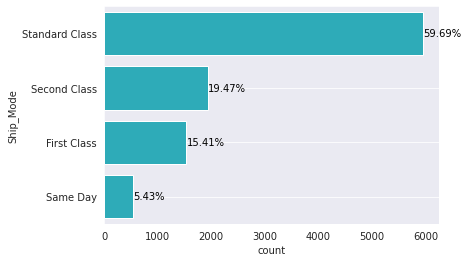

In [28]:
#visualize proportional distribution of Ship_Mode 
sb.countplot(data = samp_superstore, y = "Ship_Mode", color = choice_color, 
            order = mode_order);

#include proportion text on bars 
for i in range(mode_count.shape[0]): 
    count = mode_count[i]
    prop_str = '{:0.2f}%'.format(100 * count / mode_sum) 
    plt.text(count + 1, i, prop_str, va = "center", color = "black") 

plt.grid(b = None)    
